### Maximum Likelihood

Now to make our model more optimal Machine Learning tells us to find the Loss Function / Error Function .

Loss Function -> Quantitatively analysing the mistakes .

Here comes the maximum likelihood in picture .

In maximum likelihood takes the product of all probabilities of the model and one with maximum probabbility is the best.

But problem here is that in real world data the numberb becomes very small so we have to replace it with summation so now we take cross entropy of them .

Loss Function formula :-

L = summation ( from i = 1 to n) -Yi log ( Yi_hat) - ( 1 - Yi ) log ( 1 - Yi_hat)

### Apply the Gradient Descent

After appling thee gradient descent our formula is:

W(new) = W(ols) + learning rate x ( Y - Y_hat) x X

### Generating Dataset

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

### Vistualization

In [2]:
import matplotlib.pyplot as plt

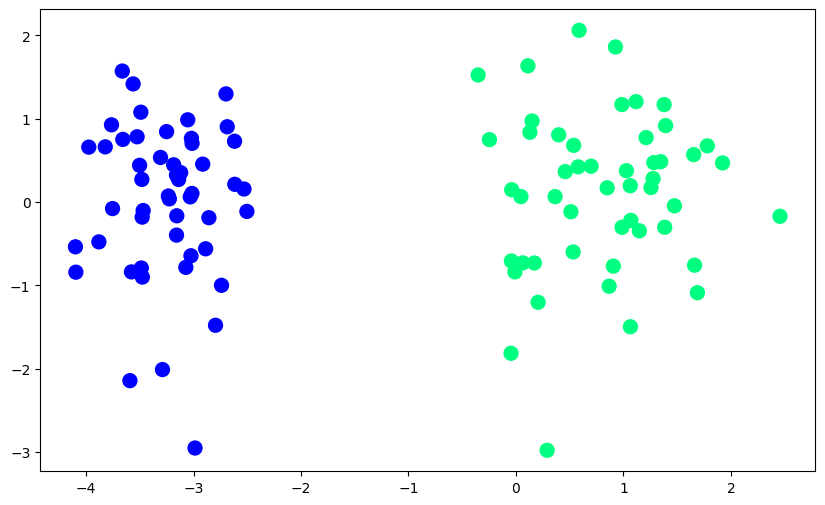

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [6]:
print(lor.coef_)
print(lor.intercept_)

[[4.78534784 0.21000512]]
[5.75407867]


In [7]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

### Gradient Descent

In [9]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
coef_,intercept_ = gd(X,y)

In [12]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [13]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

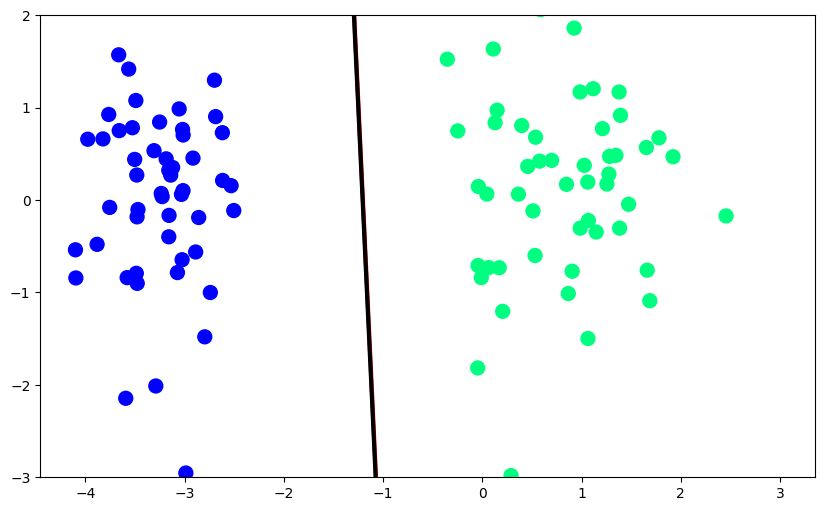

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)